In [56]:
import pandas as pd
import numpy as np
import warnings   
import seaborn as sns
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")

In [57]:
from sklearn.datasets import fetch_california_housing
# as_frame=True loads the data in a dataframe format, with other metadata besides it
california_housing = fetch_california_housing(as_frame=True)
# Select only the dataframe part and assign it to the data variable
data = california_housing.frame

In [58]:
data

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [59]:
data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [60]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [61]:
data.isnull().sum()

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

#### Regression with K-Nearest Neighbors with Scikit-Learn
##### Preprocessing Data for KNN Regression

In [62]:
y = data['MedHouseVal']
X = data.drop(['MedHouseVal'], axis = 1)

In [63]:
# .T transposes the results, transforming rows into columns
X.describe().T

,count,mean,std,min,25%,50%,75%,max
MedInc,20640.0,3.870671,1.899822,0.499900,2.563400,3.534800,4.743250,15.000100
HouseAge,20640.0,28.639486,12.585558,1.000000,18.000000,29.000000,37.000000,52.000000
AveRooms,20640.0,5.429000,2.474173,0.846154,4.440716,5.229129,6.052381,141.909091
AveBedrms,20640.0,1.096675,0.473911,0.333333,1.006079,1.048780,1.099526,34.066667
Population,20640.0,1425.476744,1132.462122,3.000000,787.000000,1166.000000,1725.000000,35682.000000
AveOccup,20640.0,3.070655,10.386050,0.692308,2.429741,2.818116,3.282261,1243.333333
Latitude,20640.0,35.631861,2.135952,32.540000,33.930000,34.260000,37.710000,41.950000
Longitude,20640.0,-119.569704,2.003532,-124.350000,-121.800000,-118.490000,-118.010000,-114.310000


##### Splitting Data into Train and Test Sets

In [64]:
from sklearn.model_selection import train_test_split

SEED = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=SEED)

In [11]:
len(X)       
len(X_train) 
len(X_test) 

6192

##### Feature Scaling for KNN Regression

In [12]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
# Fit only on X_train
scaler.fit(X_train)

# Scale both X_train and X_test
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [13]:
col_names=['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']
scaled_data = pd.DataFrame(X_train, columns=col_names)
scaled_data.describe().T

,count,mean,std,min,25%,50%,75%,max
MedInc,14448.0,-9.301038e-17,1.000035,-1.772846,-0.687546,-0.177333,0.462602,5.839437
HouseAge,14448.0,-5.594147e-17,1.000035,-2.186232,-0.838437,0.033665,0.667922,1.857152
AveRooms,14448.0,3.965236e-16,1.000035,-1.854194,-0.403180,-0.083841,0.253748,55.623328
AveBedrms,14448.0,3.572032e-16,1.000035,-1.708893,-0.203919,-0.108476,0.005128,54.836403
Population,14448.0,6.583881e-17,1.000035,-1.249733,-0.558617,-0.227969,0.262302,30.042538
AveOccup,14448.0,2.570099e-17,1.000035,-0.196144,-0.055673,-0.024415,0.012923,100.233841
Latitude,14448.0,-1.465605e-15,1.000035,-1.451850,-0.801000,-0.646481,0.968938,2.949583
Longitude,14448.0,3.871472e-15,1.000035,-2.379545,-1.106366,0.536284,0.785927,2.633284


#### Training and Predicting KNN Regression

In [14]:
from sklearn.neighbors import KNeighborsRegressor
regressor = KNeighborsRegressor(n_neighbors=5)
regressor.fit(X_train, y_train)

KNeighborsRegressor()

In [15]:
y_pred = regressor.predict(X_test)
y_pred

array([0.4988  , 0.7646  , 4.750006, ..., 1.8994  , 1.5456  , 2.2738  ])

#### Evaluating the Algorithm for KNN Regression

In [16]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

print(f'mae: {mae}')
print(f'mse: {mse}')
print(f'rmse: {rmse}')

mae: 0.44652109916020666
mse: 0.42949402014873317
rmse: 0.6553579328494721


In [17]:
#R^2
regressor.score(X_test, y_test)

0.6727764602454027

In [18]:
y.describe()

count    20640.000000
mean         2.068558
std          1.153956
min          0.149990
25%          1.196000
50%          1.797000
75%          2.647250
max          5.000010
Name: MedHouseVal, dtype: float64

##### Finding the Best K for KNN Regression

In [19]:
error = []

# Calculating MAE error for K values between 1 and 39
for i in range(1, 40):
    knn = KNeighborsRegressor(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    mae = mean_absolute_error(y_test, pred_i)
    error.append(mae)

Text(0, 0.5, 'Mean Absolute Error')

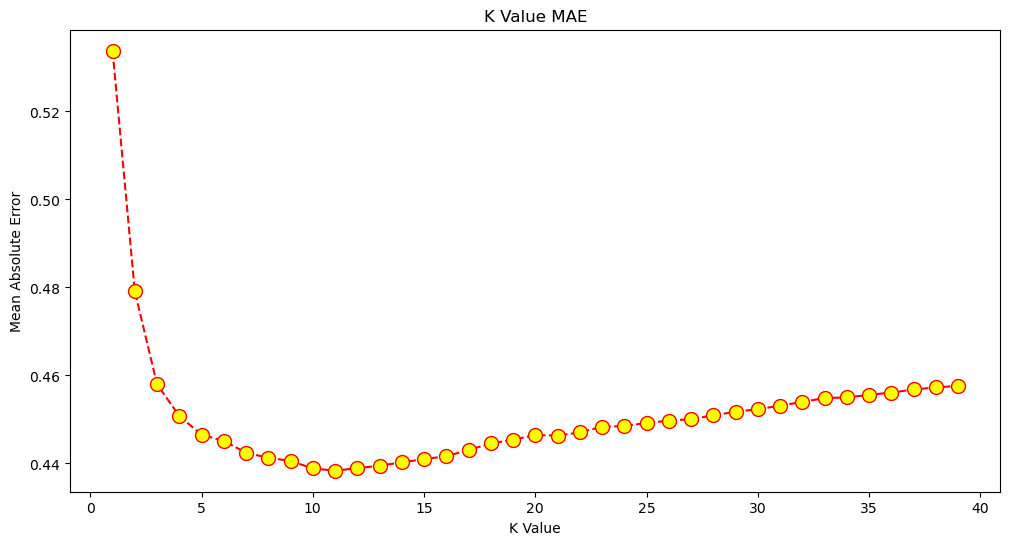

In [70]:
import matplotlib.pyplot as plt 

plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', 
         linestyle='dashed', marker='o',
         markerfacecolor='yellow', markersize=10)
         
plt.title('K Value MAE')
plt.xlabel('K Value')
plt.ylabel('Mean Absolute Error')

Text(0, 0.5, 'Mean Absolute Error')

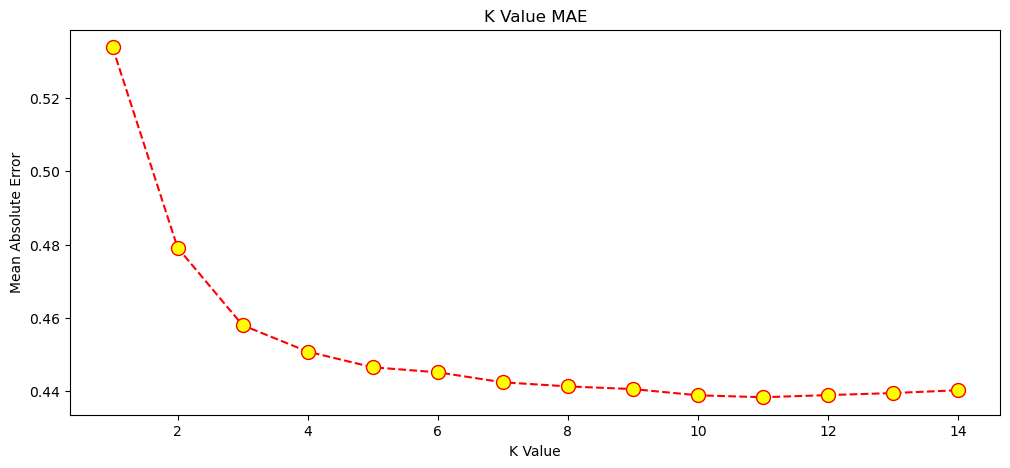

In [69]:
plt.figure(figsize=(12, 5))
plt.plot(range(1, 15), error[:14], color='red', 
         linestyle='dashed', marker='o',
         markerfacecolor='yellow', markersize=10)
plt.title('K Value MAE')
plt.xlabel('K Value')
plt.ylabel('Mean Absolute Error')

In [22]:
print(min(error))               
print(np.array(error).argmin()) 

0.4383553340086916
10


In [23]:
knn_reg12 = KNeighborsRegressor(n_neighbors=12)
knn_reg12.fit(X_train, y_train)
y_pred12 = knn_reg12.predict(X_test)
r2 = knn_reg12.score(X_test, y_test) 

mae12 = mean_absolute_error(y_test, y_pred12)
mse12 = mean_squared_error(y_test, y_pred12)
rmse12 = mean_squared_error(y_test, y_pred12, squared=False)
print(f'r2: {r2}, \nmae: {mae12} \nmse: {mse12} \nrmse: {rmse12}')

r2: 0.6870126694569266, 
mae: 0.4389332237833764 
mse: 0.41080842457537875 
rmse: 0.6409433864042742


### Classification using K-Nearest Neighbors

In [24]:
# Creating 4 categories and assigning them to a MedHouseValCat column
data["MedHouseValCat"] = pd.qcut(data["MedHouseVal"], 4, retbins=False, labels=[1, 2, 3, 4])

In [25]:
y = data['MedHouseValCat']
X = data.drop(['MedHouseVal', 'MedHouseValCat'], axis = 1)

In [39]:
from sklearn.model_selection import train_test_split

SEED = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=SEED)

In [40]:
#Feature Scaling for Classification
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

### Training and Predicting for Classification

In [41]:
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier()
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [42]:
y_pred = classifier.predict(X_test)
y_pred

array([1, 1, 4, ..., 4, 1, 3], dtype=int64)

#### Evaluating KNN for Classification

In [43]:
accuracy =  classifier.score(X_test, y_test)
print(accuracy)

0.6150678294573644


              precision    recall  f1-score   support

           1       0.74      0.77      0.76      1038
           2       0.49      0.55      0.52      1039
           3       0.51      0.51      0.51      1032
           4       0.76      0.62      0.68      1019

    accuracy                           0.62      4128
   macro avg       0.62      0.61      0.62      4128
weighted avg       0.62      0.62      0.62      4128



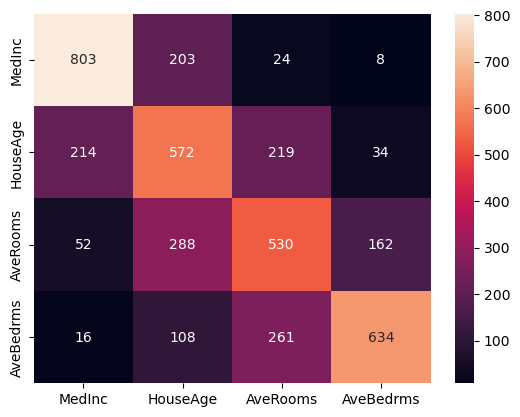

In [44]:
from sklearn.metrics import classification_report, confusion_matrix
#importing Seaborn's to use the heatmap 
import seaborn as sns

# Adding classes names for better interpretation
classes_names = ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms']
cm = pd.DataFrame(confusion_matrix(y_test, y_pred), 
                  columns=classes_names, index = classes_names)
                  
# Seaborn's heatmap to better visualize the confusion matrix
sns.heatmap(cm, annot=True, fmt='d');

print(classification_report(y_test, y_pred))

#### Finding the Best K for KNN Classification

In [45]:
from sklearn.metrics import f1_score

f1s = []

# Calculating f1 score for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    # using average='weighted' to calculate a weighted average for the 4 classes 
    f1s.append(f1_score(y_test, pred_i, average='weighted'))

Text(0, 0.5, 'F1 Score')

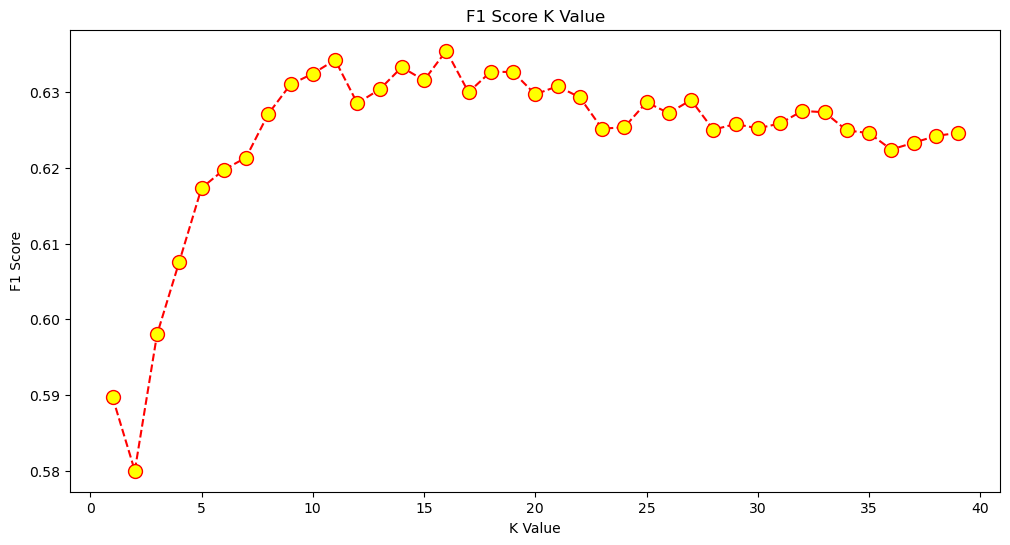

In [71]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), f1s, color='red', linestyle='dashed', marker='o',
         markerfacecolor='yellow', markersize=10)
plt.title('F1 Score K Value')
plt.xlabel('K Value')
plt.ylabel('F1 Score')

In [47]:
classifier15 = KNeighborsClassifier(n_neighbors=15)
classifier15.fit(X_train, y_train)
y_pred15 = classifier15.predict(X_test)
print(classification_report(y_test, y_pred15))

              precision    recall  f1-score   support

           1       0.76      0.79      0.78      1038
           2       0.52      0.57      0.54      1039
           3       0.50      0.53      0.51      1032
           4       0.77      0.63      0.69      1019

    accuracy                           0.63      4128
   macro avg       0.64      0.63      0.63      4128
weighted avg       0.64      0.63      0.63      4128



#### Implementing KNN for Outlier Detection with Scikit-Learn

In [48]:
from sklearn.neighbors import NearestNeighbors

nbrs = NearestNeighbors(n_neighbors = 3)
nbrs.fit(X_train)
# Distances and indexes of the 3 neighbors 
distances, indexes = nbrs.kneighbors(X_train)

In [49]:
distances[:3], distances.shape

(array([[0.        , 0.27515099, 0.37562899],
        [0.        , 0.16052619, 0.24033642],
        [0.        , 0.59136775, 0.63128094]]),
 (16512, 3))

In [50]:
indexes[:3], indexes[:3].shape

(array([[    0,  1189, 10350],
        [    1,  5144,  4582],
        [    2, 14302, 12783]], dtype=int64),
 (3, 3))

Text(0, 0.5, 'Mean Distances')

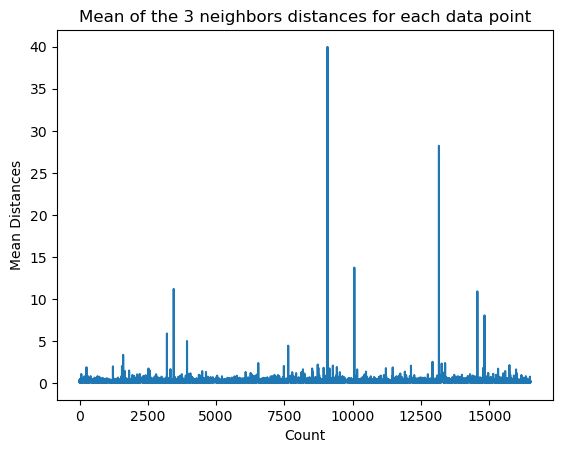

In [51]:
dist_means = distances.mean(axis=1)
plt.plot(dist_means)
plt.title('Mean of the 3 neighbors distances for each data point')
plt.xlabel('Count')
plt.ylabel('Mean Distances')

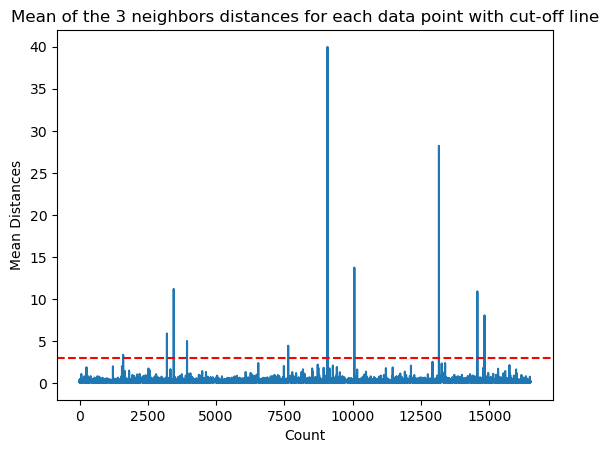

In [72]:
dist_means = distances.mean(axis=1)
plt.plot(dist_means)
plt.title('Mean of the 3 neighbors distances for each data point with cut-off line')
plt.xlabel('Count')
plt.ylabel('Mean Distances')
plt.axhline(y = 3, color = 'r', linestyle = '--')

In [73]:
# Visually determine cutoff values > 3
outlier_index = np.where(dist_means > 3)
outlier_index

(array([ 1596,  3199,  3447,  3934,  7639,  9079, 10061, 13159, 14566,
        14827], dtype=int64),)

In [74]:
# Filter outlier values
outlier_values = data.iloc[outlier_index]
outlier_values

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
1596,5.2079,21.0,5.460899,1.086522,1398.0,2.326123,37.89,-122.10,3.103
3199,4.3911,21.0,5.976027,0.910959,837.0,2.866438,36.35,-119.65,1.079
3447,2.5250,17.0,3.787431,1.012939,2243.0,4.146026,34.24,-118.42,1.637
3934,3.7798,27.0,4.769625,1.034130,1702.0,2.904437,34.22,-118.57,2.584
7639,4.5260,21.0,6.285714,1.025917,4185.0,2.645386,33.80,-118.29,3.294
9079,4.7875,19.0,6.007005,1.052539,1817.0,3.182137,34.76,-118.28,1.636
10061,3.5417,17.0,6.150943,1.161725,974.0,2.625337,39.30,-120.89,1.551
13159,2.9554,52.0,5.068120,1.089918,1215.0,3.310627,36.84,-121.40,1.365
14566,4.5402,34.0,6.441791,1.092537,1046.0,3.122388,32.84,-117.21,1.821
14827,1.6389,37.0,3.733333,1.000000,1086.0,3.290909,32.66,-117.09,1.143
